# Linear Regression

This assignment will implement linear regression with one variable to predict profits for a restaurant franchise.


# Outline
- [ 1 - Packages ](#1)
- [ 2  Problem Statement](#2)
- [ 3  Dataset](#3)
- [ 4  Refresher on linear regression](#4)
- [ 5  Compute Cost](#5)
- [ 6  Gradient descent ](#6)
- [ 7  Learning parameters using batch gradient descent ](#7)


<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

<a name="2"></a>
## 2 -  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

<a name="3"></a>
## 3 - Dataset

  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [8]:
x_train = np.array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
         8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
         5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
        20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
        13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
         7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
        11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
         5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
         6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
        14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
        10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
         5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
         6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
         7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369])

In [9]:
y_train = np.array([17.592  ,  9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,
         4.3483 , 12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,
         3.1551 ,  7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,
         3.6518 ,  5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,
         3.0825 , 22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  ,
        -1.22   ,  5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,
         4.1164 ,  3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,
         5.3854 ,  2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,
         8.0043 ,  1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,
         1.4233 , -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,
         5.1694 , -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,
         5.7442 ,  7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,
         1.2784 ,  3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,
         6.7526 ,  2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,
         5.3436 ,  4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.8214 ,
         1.8451 ,  4.2959 ,  7.2029 ,  1.9869 ,  0.14454,  9.0551 ,
         0.61705])

`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101
  


Similarly, `y_train` is a numpy array that has decimal values, some negative, some positive.
- These represent restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

#### Checking the dimensions of variables

printing the shape of `x_train` and `y_train` to see how many training examples are there in the dataset.

In [13]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


The city population array has 97 data points, and the monthly average profits also has 97 data points. These are NumPy 1D arrays.

#### Visualizing the data

It is often useful to understand the data by visualizing it. 
- For this dataset, scatter plot can be used to visualize the data, since it has only two properties to plot (profit and population). 

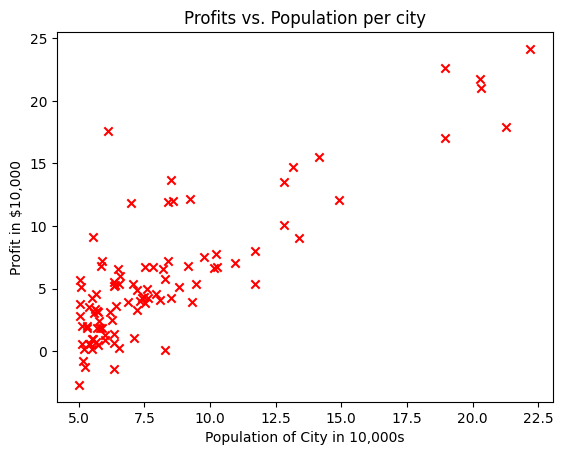

In [16]:
# Creating a scatter plot of the data

plt.scatter(x_train, y_train, marker='x', color='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

Objective here is to build a linear regression model to fit this data.
- With this model, for input as new city's population, the model estimates restaurant's potential monthly profits for that city.

<a name="4"></a>
## 4 - Refresher on linear regression

fit the linear regression parameters $(w,b)$ to the dataset.
- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (restaurant's monthly profit for that city) is represented as 
    $f_{w,b}(x) = wx + b$
    

- To train a linear regression model, goal is to find the best $(w,b)$ parameters that fit the dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, we can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, a method called **gradient descent** can be used. 
  - With each step of gradient descent, the parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

<a name="5"></a>
## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of parameters $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful to monitor the progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In the cell below, a function called `compute_cost(x,y,w,b)` is defined to calculate the total cost

#### Cost function
The cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

-  $f_{w,b}(x^{(i)})$ is the model's prediction of restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$


In [17]:
# Defining cost funtion to compute the cost

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    total_cost = 0
     
    for i in range(m):
        f_wb_i = w*x[i]+b    # prediction for (i)th training example
        total_cost = total_cost + (f_wb_i - y[i])**2 
        
    total_cost = total_cost/(2*m)
    
    return total_cost

In [18]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 75.203


<a name="6"></a>
## 6 - Gradient descent 

Now, let's implement the gradient for parameters $w, b$ for linear regression. 

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


A function called `compute_gradient` will be defined which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

In [19]:
# Defining gradient function to compute gradient

def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        
        f_wb_i = w*x[i] + b      # prediction for (i)th training example
        err = f_wb_i - y[i]      # error for (i)th training example
        dj_dw = dj_dw + err*x[i]
        dj_db = dj_db + err
    
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return dj_dw, dj_db

In [20]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


In [21]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


<a name="7"></a>
## 7 Learning parameters using batch gradient descent 

Finding the optimal parameters of a linear regression model by using batch gradient descent. Batch refers to running all the examples in one iteration.

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming that the implementation of gradient descent and computation of cost is done correctly, then, with an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [28]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [33]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 2000
alpha = 0.01

w,b,J_history,w_history = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  200: Cost     5.17   
Iteration  400: Cost     4.82   
Iteration  600: Cost     4.64   
Iteration  800: Cost     4.56   
Iteration 1000: Cost     4.52   
Iteration 1200: Cost     4.50   
Iteration 1400: Cost     4.49   
Iteration 1600: Cost     4.48   
Iteration 1800: Cost     4.48   
w,b found by gradient descent: 1.182212774757377 -3.7880685727231103


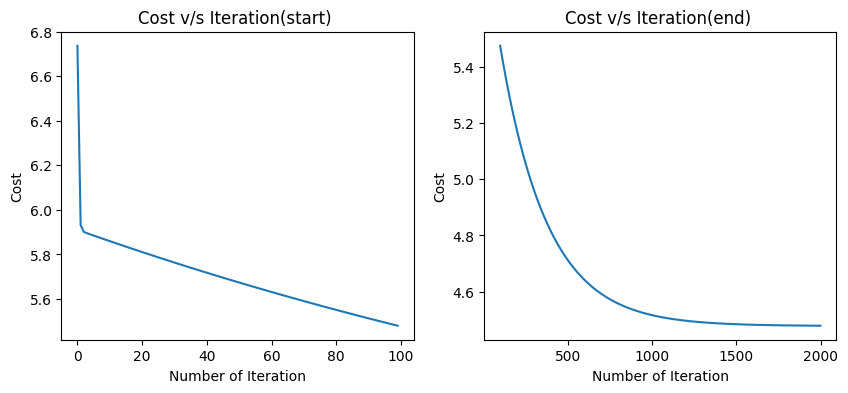

In [59]:
# plotting the Cost with number of iteration

fig,ax = plt.subplots(1,2,figsize=(10,4))

# plot for first 100 iteration 
ax[0].plot(J_history[:100])
ax[0].set_xlabel("Number of Iteration")
ax[0].set_ylabel("Cost")
ax[0].set_title("Cost v/s Iteration(start) ");

# plot for remaining iteration
ax[1].plot(np.arange(100,2000),J_history[100:])
ax[1].set_xlabel("Number of Iteration")
ax[1].set_ylabel("Cost")
ax[1].set_title("Cost v/s Iteration(end) ")


plt.show();

In the above figure, we see that Cost starts to converge to its minimum value after 1000 iterations and the flat line between 1500 and 2000 number of iteraration indicates that cost is not decreasing any further and minimum cost has been achieved. Also, optimal values of paramters w and b is found.

We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [61]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

We will now plot the predicted values to see the linear fit.

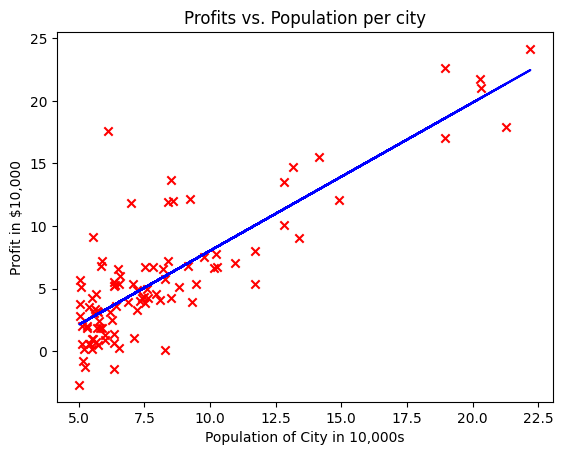

In [65]:
# Plot the linear fit
plt.plot(x_train, predicted, color="b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', color='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s');

The final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`


In [68]:
predict1 = 3.5 * w + b
print(f"For population = 35,000, we predict a profit of ${predict1*10000:.2f}")

predict2 = 7.0 * w + b
print(f"For population = 70,000, we predict a profit of ${predict2*10000:.2f}")

For population = 35,000, we predict a profit of $3496.76
For population = 70,000, we predict a profit of $44874.21
